In [1]:
import os
import sys

sys.executable = os.path.join('/home/rfpred/envs/rfenv', 'bin', 'python3.11')
sys.path.append('/home/rfpred')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages')

print(sys.path)
%pwd

['/home/rfpred/notebooks', '/home/wscheurer/anaconda3/lib/python311.zip', '/home/wscheurer/anaconda3/lib/python3.11', '/home/wscheurer/anaconda3/lib/python3.11/lib-dynload', '', '/home/wscheurer/anaconda3/lib/python3.11/site-packages', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages']


'/home/rfpred/notebooks'

In [32]:
# import all the functions within imgproc.py
from funcs.rf_tools import (get_dat, calculate_sigma, calculate_pRF_location, prf_plots_new, prf_plots, make_visrois_dict, 
                            make_gaussian_2d, make_circle_mask, css_gaussian_cut, roi_filter, write_prf_dict, plot_prf_data, 
                            get_mask, compare_masks, prf_heatmap, get_img_prf)
from funcs.utility import print_dict_structure
from funcs.imgproc import show_stim

In [3]:
n_subjects = len(os.listdir('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata'))

In [4]:
vismask_dict = make_visrois_dict(vox_count = 'y', bin_check = 'n', n_subjects=n_subjects)

Subject 1
V1_mask
Non-zero voxels in V1_mask: 7887
V2_mask
Non-zero voxels in V2_mask: 8296
V3_mask
Non-zero voxels in V3_mask: 7022
V4_mask
Non-zero voxels in V4_mask: 3976
Subject 2
V1_mask
Non-zero voxels in V1_mask: 6476
V2_mask
Non-zero voxels in V2_mask: 6376
V3_mask
Non-zero voxels in V3_mask: 6236
V4_mask
Non-zero voxels in V4_mask: 2887
Subject 3
V1_mask
Non-zero voxels in V1_mask: 7358
V2_mask
Non-zero voxels in V2_mask: 6721
V3_mask
Non-zero voxels in V3_mask: 5316
V4_mask
Non-zero voxels in V4_mask: 2486
Subject 4
V1_mask
Non-zero voxels in V1_mask: 5119
V2_mask
Non-zero voxels in V2_mask: 5088
V3_mask
Non-zero voxels in V3_mask: 4669
V4_mask
Non-zero voxels in V4_mask: 2790
Subject 5
V1_mask
Non-zero voxels in V1_mask: 6502
V2_mask
Non-zero voxels in V2_mask: 6309
V3_mask
Non-zero voxels in V3_mask: 5383
V4_mask
Non-zero voxels in V4_mask: 3184
Subject 6
V1_mask
Non-zero voxels in V1_mask: 6479
V2_mask
Non-zero voxels in V2_mask: 6905
V3_mask
Non-zero voxels in V3_mask: 71

In [5]:
prf_dict = write_prf_dict(binary_masks = vismask_dict)
# print_dict_structure(prf_dict)

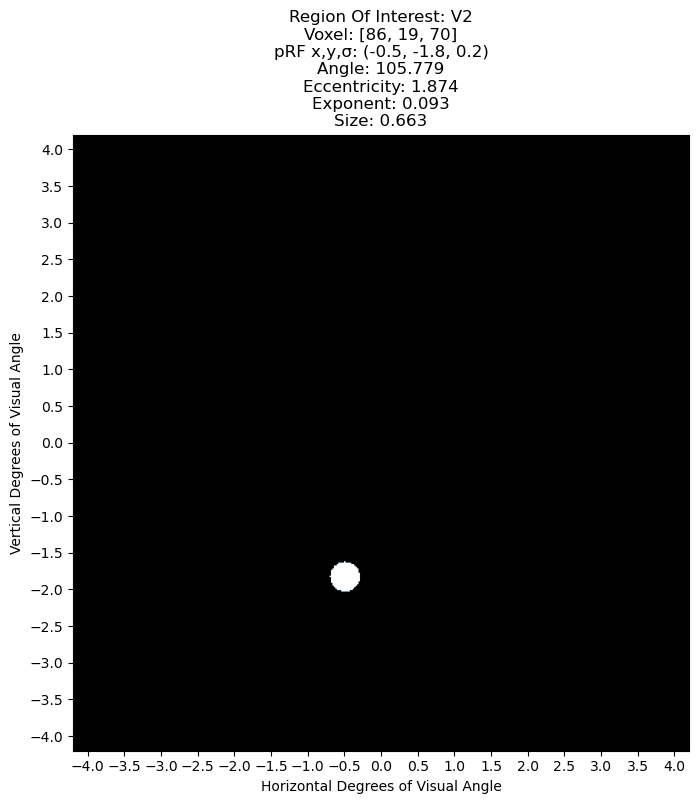

In [6]:
mask,pRFx,pRFy,pRFsig, iter = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='circle', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=.1, sigma_max = 4.2)


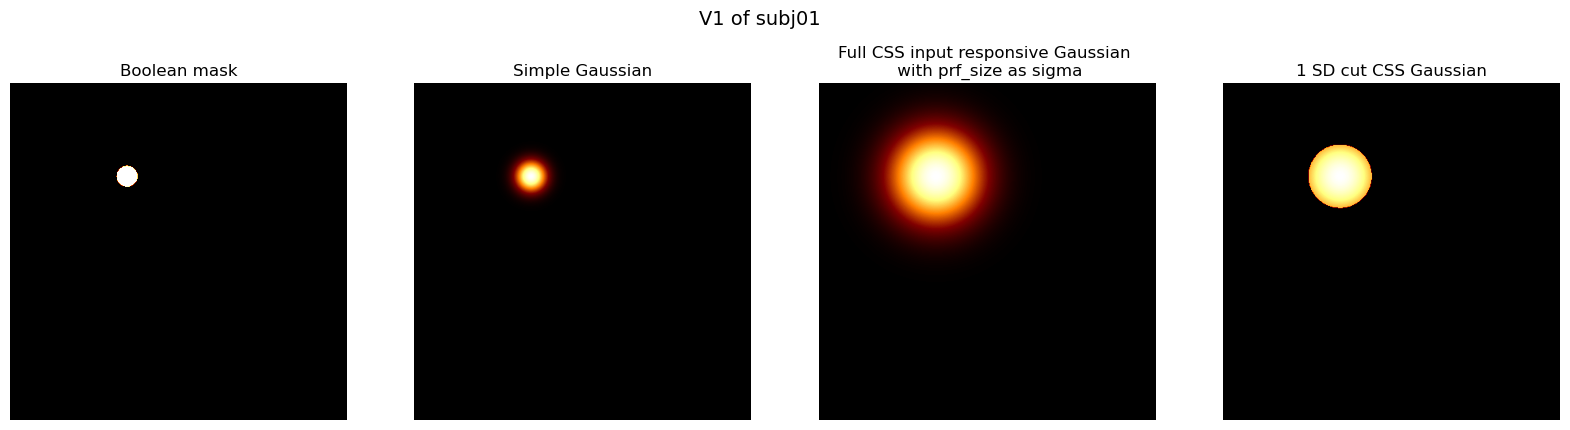

In [212]:
compare_masks(mask_dict =  vismask_dict, prf_dict = prf_dict)

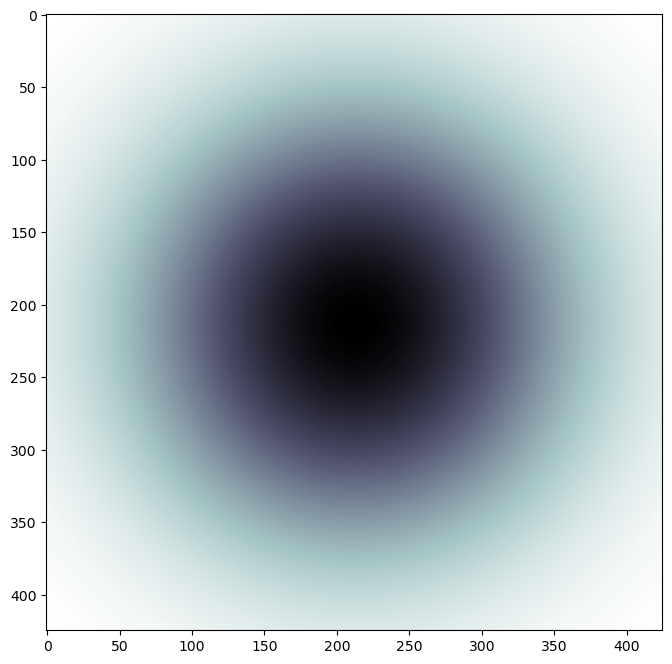

In [213]:
testmask = make_gaussian_2d(425, ((1 + 425) / 2), ((1 + 425) / 2), (2 * 425 / 8.4))

import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(8,8))
ax.imshow((1 - testmask), cmap = 'bone')

In [9]:
import numpy as np
print(np.abs(1 -(testmask)))

[[0.98809 0.98785 0.98759 ... 0.98707 0.98733 0.98759]
 [0.98785 0.98759 0.98733 ... 0.9868  0.98707 0.98733]
 [0.98759 0.98733 0.98707 ... 0.98653 0.9868  0.98707]
 ...
 [0.98707 0.9868  0.98653 ... 0.98596 0.98625 0.98653]
 [0.98733 0.98707 0.9868  ... 0.98625 0.98652 0.9868 ]
 [0.98759 0.98733 0.98707 ... 0.98653 0.9868  0.98707]]


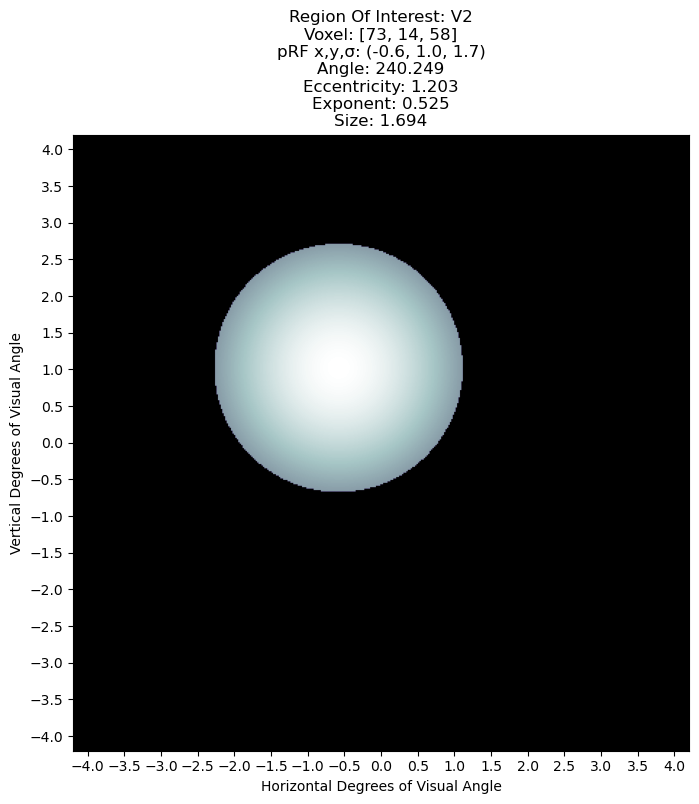

In [108]:
mask,pRFx,pRFy,pRFsig, iter = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='cut_gaussian', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=1, sigma_max = 4.2, rand_seed=11)


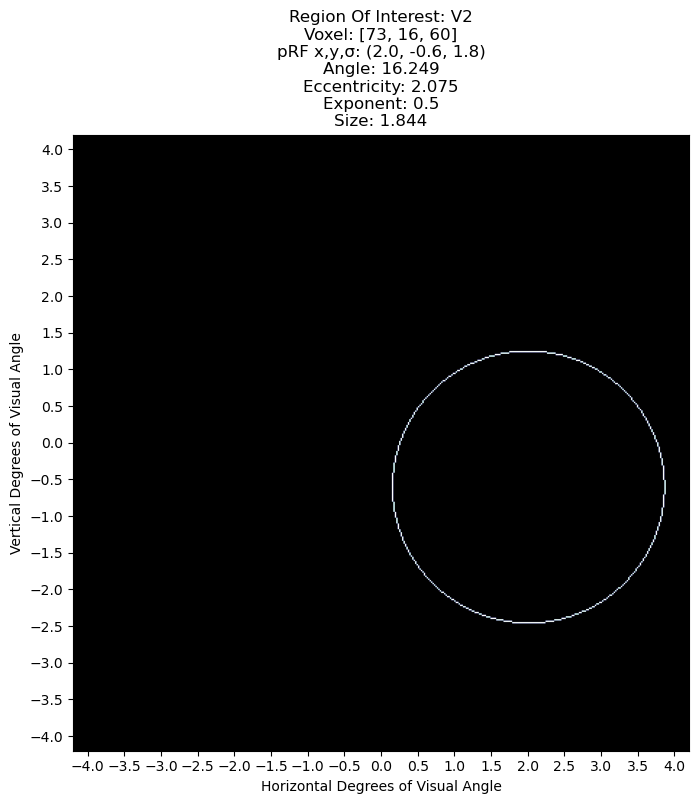

In [109]:
mask,pRFx,pRFy,pRFsig, iter = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='outline', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=1, sigma_max = 4.2)


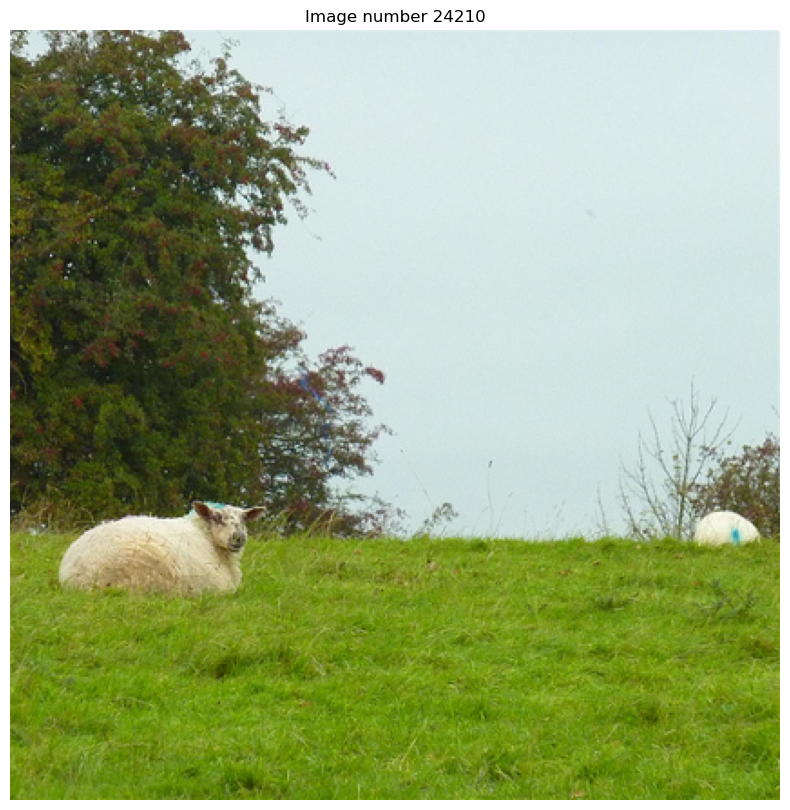

In [115]:
stim_img, img_no = show_stim()

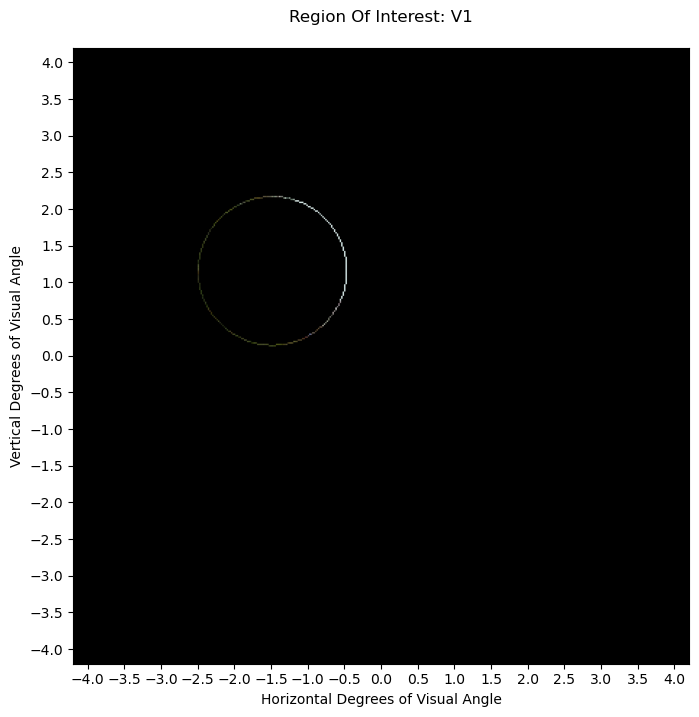

In [119]:
get_img_prf(stim_img, type='outline', binary_masks = vismask_dict, 
            prf_proc_dict = prf_dict, roi = 'V1', sigma_min = .1, 
            sigma_max = 4.2, rand_seed=146)

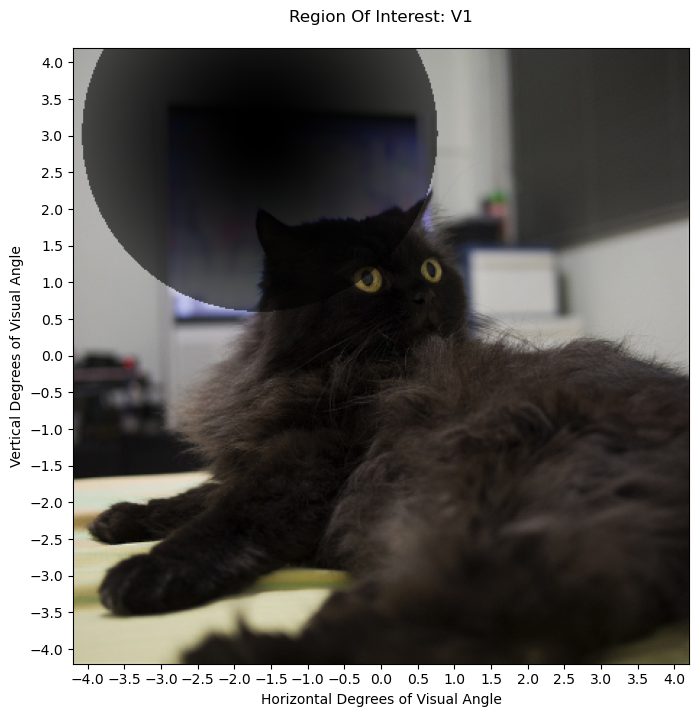

In [206]:


get_img_prf(show_stim(hide='y')[0], type='cut_gaussian', binary_masks = vismask_dict, 
            prf_proc_dict = prf_dict, roi = 'V1', sigma_min = 1, 
            sigma_max = 4.2, central='n', invert='y')